KMEANS NOVA PROBA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


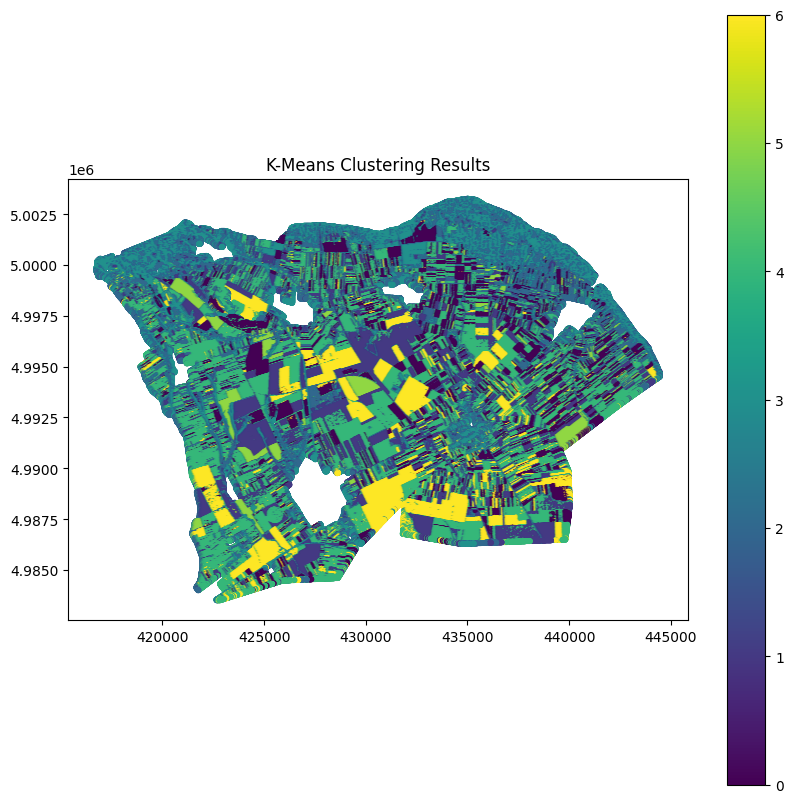

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Učitavanje CSV podataka
data = pd.read_csv('/content/drive/MyDrive/biosense/CSVFINAL.csv')

# Kreiranje geometrijskog objekta Point na osnovu x i y koordinata
geometry = [Point(xy) for xy in zip(data['x'], data['y'])]

# Kreiranje GeoDataFrame-a
geo_data = gpd.GeoDataFrame(data, geometry=geometry)

# Select the relevant columns for clustering (e.g., channel data)
# Exclude 'x', 'y', and 'Piksel' columns for clustering
features = geo_data.drop(['x', 'y', 'Piksel', 'geometry'], axis=1)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Set the number of clusters (k) to 7
k = 7

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to your GeoDataFrame
geo_data['Cluster'] = clusters

# Visualize the clusters on a map
geo_data.plot(column='Cluster', cmap='viridis', legend=True, markersize=10, figsize=(10, 10))
plt.title('K-Means Clustering Results')
plt.show()


In [ ]:
import pandas as pd

# Assuming 'data' is the DataFrame from the previous code with the cluster labels
result_df = geo_data[['Piksel', 'Cluster']]

# Save the result to a CSV file
result_df.to_csv('KMEANS7.csv', index=False)
display (result_df)

,Piksel,Cluster
0,1825,3
1,1826,3
2,1827,3
3,1828,3
4,1829,3
...,...,...
3200249,5477281,4
3200250,5477282,4
3200251,5477283,4
3200252,5477284,4


In [ ]:
import pandas as pd

# Učitajte podatke iz vašeg CSV fajla
data = pd.read_csv('KMEANS7.csv')

# Koristite 'value_counts' za brojanje piksela po klasterima
cluster_counts = data['Cluster'].value_counts()

# Ispisujte broj piksela za svaku vrednost klastera
for cluster, count in cluster_counts.items():
    print(f'Cluster {cluster} - Broj piksela: {count}')


Cluster 4 - Broj piksela: 975390
Cluster 1 - Broj piksela: 535571
Cluster 2 - Broj piksela: 534027
Cluster 0 - Broj piksela: 407378
Cluster 6 - Broj piksela: 340153
Cluster 3 - Broj piksela: 317530
Cluster 5 - Broj piksela: 90205


In [ ]:
import pandas as pd

# Učitajte podatke iz vašeg CSV fajla
data = pd.read_csv('KMEANS7.csv')

# Postavite putanju do foldera
folder_path = '/content/drive/MyDrive/biosense/NOVO'

# Kreirajte folder ako ne postoji
import os
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Dodajte željeni naziv fajla u putanju
file_path = os.path.join(folder_path, 'KMEANS7.csv')

# Sačuvajte rezultat u CSV fajlu
data.to_csv(file_path, index=False)

In [ ]:
import pandas as pd

# Putanja do CSV fajla
putanja_do_csv_fajla = '/content/drive/MyDrive/biosense/NOVO/KMEANS7.csv'

# Učitavanje CSV fajla u DataFrame
df_kmeans6res = pd.read_csv(putanja_do_csv_fajla)

# Prikaz prvih nekoliko redova DataFrame-a
print("DataFrame 'KMEANS7':")
print(df_kmeans6res.head())

DataFrame 'KMEANS7':
   Piksel  Cluster
0    1825        3
1    1826        3
2    1827        3
3    1828        3
4    1829        3


In [ ]:
# Učitajte podatke iz CSV fajlova
data_original = pd.read_csv('/content/drive/MyDrive/biosense/CSVFINAL.csv')
data_clustered = pd.read_csv('/content/drive/MyDrive/biosense/NOVO/KMEANS7.csv')

# Spojite DataFrame-ove na osnovu kolone 'Piksel'
merged_data = pd.merge(data_original, data_clustered[['Piksel', 'Cluster']], on='Piksel')

# Odaberite samo potrebne kolone
merged_data = merged_data[['Piksel', 'Cluster', 'x', 'y']]

# Prikazuje rezultirajući DataFrame
print(merged_data.head())


   Piksel  Cluster         x          y
0    1825        3  434985.0  5003255.0
1    1826        3  434995.0  5003255.0
2    1827        3  435005.0  5003255.0
3    1828        3  435015.0  5003255.0
4    1829        3  435025.0  5003255.0


In [ ]:
import os

# Putanja do foldera na Google Drive-u
putanja_do_drive_foldera = '/content/drive/MyDrive/biosense/NOVO'

# Provera da li folder postoji, ako ne postoji, kreira se
if not os.path.exists(putanja_do_drive_foldera):
    os.makedirs(putanja_do_drive_foldera)

# Naziv CSV fajla
naziv_csv_fajla = 'KMEANS7xy.csv'

# Konačna putanja do CSV fajla
putanja_do_csv_fajla = os.path.join(putanja_do_drive_foldera, naziv_csv_fajla)

# Sačuvaj DataFrame 'merged_data' u CSV fajl
merged_data.to_csv(putanja_do_csv_fajla, index=False)

print(f"DataFrame 'merged_data' je uspešno sačuvan u CSV fajlu: {putanja_do_csv_fajla}")

DataFrame 'merged_data' je uspešno sačuvan u CSV fajlu: /content/drive/MyDrive/biosense/NOVO/KMEANS7xy.csv


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Putanje do fajlova
csv_file_path = '/content/drive/MyDrive/biosense/NOVO/KMEANS7xy.csv'
shp_file_path = '/content/drive/MyDrive/Indjija_2018_GT.shp'

# Željeni CRS
zeljeni_crs = 'EPSG:32634'
# Učitavanje CSV fajla
df_pixels = pd.read_csv(csv_file_path)

# Učitavanje Shapefile-a
gdf_parcel = gpd.read_file(shp_file_path)

# Promena CRS-a Shapefile-a
gdf_parcel = gdf_parcel.to_crs(zeljeni_crs)

# Kreiranje geometrije tačaka na osnovu x i y koordinata
geometry_pixels = [Point(xy) for xy in zip(df_pixels['x'], df_pixels['y'])]

# Kreiranje GeoDataFrame-a sa pikselima
gdf_pixels = gpd.GeoDataFrame(df_pixels, crs=gdf_parcel.crs, geometry=geometry_pixels)

# Spajanje piksela sa parcelama prema lokaciji
joined = gpd.sjoin(gdf_pixels, gdf_parcel, how="left", op='within')

# Resetovanje indeksa
joined.reset_index(drop=True, inplace=True)

# Ažuriranje klase u CSV fajlu
df_pixels['nova_klasa'] = joined['class'].fillna(999)  # Prilagodi 'class' stvarnom imenu kolone

# Čuvanje ažuriranog CSV fajla
df_pixels.to_csv('/content/drive/MyDrive/biosense/NOVO/KMEANS7comp.csv', index=False)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
import pandas as pd

# Putanja do CSV fajla
putanja_do_csv_fajla = '/content/drive/MyDrive/biosense/NOVO/KMEANS7comp.csv'

# Učitavanje CSV fajla u DataFrame
df_kmeans = pd.read_csv(putanja_do_csv_fajla)

# Prikaz prvih nekoliko redova DataFrame-a
print("DataFrame 'kmeansXY':")
print(df_kmeans.head())


DataFrame 'kmeansXY':
   Piksel  Cluster         x          y  nova_klasa
0    1825        3  434985.0  5003255.0       999.0
1    1826        3  434995.0  5003255.0       999.0
2    1827        3  435005.0  5003255.0       999.0
3    1828        3  435015.0  5003255.0       999.0
4    1829        3  435025.0  5003255.0       999.0


In [ ]:
# Prikaz svih vrednosti u koloni 'nova_klasa' i brojanje ponavljanja
frekvencije_nova_klasa = df_kmeans['nova_klasa'].value_counts()

print("Sve vrednosti u koloni 'nova_klasa' i broj ponavljanja:")
print(frekvencije_nova_klasa)

Sve vrednosti u koloni 'nova_klasa' i broj ponavljanja:
999.0    3003091
0.0        75006
3.0        65748
1.0        38494
6.0        16499
2.0         1177
7.0          162
5.0           77
Name: nova_klasa, dtype: int64


In [ ]:
# Izbacivanje redova sa vrednošću 999.0 u koloni 'nova_klasa' u mestu
df_kmeans.drop(df_kmeans[df_kmeans['nova_klasa'] == 999.0].index, inplace=True)

# Prikaz prvih nekoliko redova ažuriranog DataFrame-a
print("DataFrame nakon izbacivanja redova sa vrednošću 999.0:")
print(df_kmeans.head())

DataFrame nakon izbacivanja redova sa vrednošću 999.0:
        Piksel  Cluster         x          y  nova_klasa
157051  580764        0  428805.0  5001165.0         6.0
157052  580765        0  428815.0  5001165.0         6.0
157053  580766        0  428825.0  5001165.0         6.0
157054  580767        0  428835.0  5001165.0         6.0
157055  580768        0  428845.0  5001165.0         6.0


In [ ]:
import os

# Putanja do foldera na Google Drive-u
putanja_do_drive_foldera = '/content/drive/MyDrive/biosense/NOVO/rezultati'

# Provera da li folder postoji, ako ne postoji, kreira se
if not os.path.exists(putanja_do_drive_foldera):
    os.makedirs(putanja_do_drive_foldera)

# Naziv CSV fajla
naziv_csv_fajla = 'KMEANS7compnonull.csv'

# Konačna putanja do CSV fajla
putanja_do_csv_fajla = os.path.join(putanja_do_drive_foldera, naziv_csv_fajla)

# Izbrisati kolone 'x' i 'y'
df_kmeans_bez_xy = df_kmeans.drop(['x', 'y'], axis=1)

# Sačuvaj DataFrame bez kolona 'x' i 'y' u CSV fajl
df_kmeans_bez_xy.to_csv(putanja_do_csv_fajla, index=False)

print(f"DataFrame je uspešno sačuvan u CSV fajlu bez kolona 'x' i 'y': {putanja_do_csv_fajla}")

DataFrame je uspešno sačuvan u CSV fajlu bez kolona 'x' i 'y': /content/drive/MyDrive/biosense/NOVO/rezultati/KMEANS7compnonull.csv


In [ ]:
import pandas as pd

# Putanja do CSV fajla
putanja_do_csv_fajla = '/content/drive/MyDrive/biosense/NOVO/rezultati/KMEANS7compnonull.csv'

# Učitavanje CSV fajla u DataFrame
df_km  = pd.read_csv(putanja_do_csv_fajla)

# Prikaz prvih nekoliko redova DataFrame-a
print("DataFrame 'kmeans':")
print(df_km.head())

DataFrame 'kmeans':
   Piksel  Cluster  nova_klasa
0  580764        0         6.0
1  580765        0         6.0
2  580766        0         6.0
3  580767        0         6.0
4  580768        0         6.0


In [ ]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score

# Učitajte CSV datoteku
df = pd.read_csv('/content/drive/MyDrive/biosense/NOVO/rezultati/KMEANS7compnonull.csv')

# Pretpostavljamo da su 'stvarna_klasa' i 'predvidjena_klasa' imena kolona u vašem DataFrame-u
y_true = df['nova_klasa']
y_pred = df['Cluster']

# Izračunajte prilagođeni Rand indeks
ari_score = adjusted_rand_score(y_true, y_pred)

print(f"Prilagođeni Rand indeks: {ari_score}")

Prilagođeni Rand indeks: 0.19673628978303268
